## MOHD ARHAM SHAIKH 
## 200968051
## DEEP LEARNING LAB WEEK 1


In [38]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
fmnist=tf.keras.datasets.fashion_mnist

In [41]:
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
#dimensions of each image = 28 x 28

In [44]:
len(np.unique(y_test))

10

In [1]:
# number of classes =10

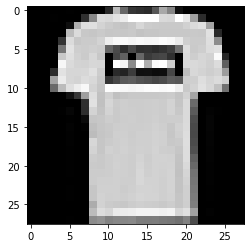

In [45]:
plt.imshow(x_train[1],cmap="gray")

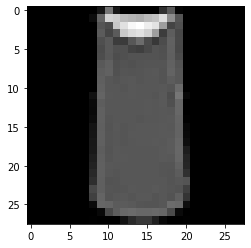

In [19]:
plt.imshow(x_train[2],cmap="gray")

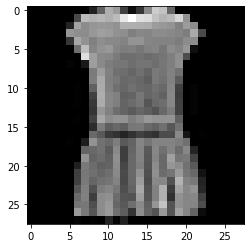

In [20]:
plt.imshow(x_train[3],cmap="gray")

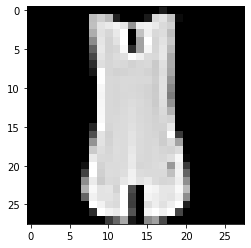

In [21]:
plt.imshow(x_train[4],cmap="gray")

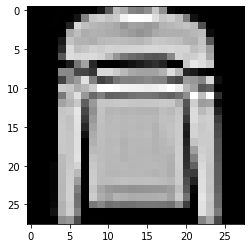

In [22]:
plt.imshow(x_train[5],cmap="gray")

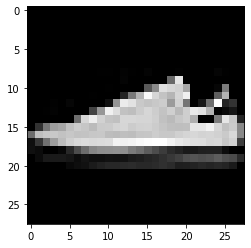

In [23]:
plt.imshow(x_train[6],cmap="gray")

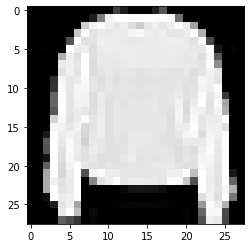

In [24]:
plt.imshow(x_train[7],cmap="gray")

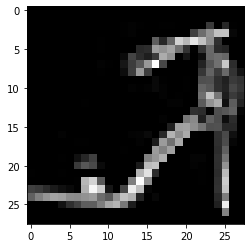

In [25]:
plt.imshow(x_train[8],cmap="gray")

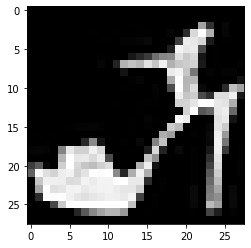

In [26]:
plt.imshow(x_train[9],cmap="gray")

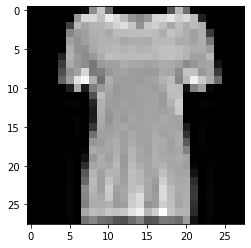

In [27]:
plt.imshow(x_train[10],cmap="gray")

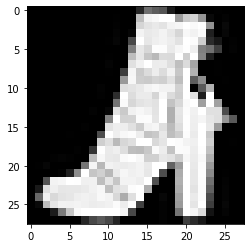

In [28]:
plt.imshow(x_train[11],cmap="gray")

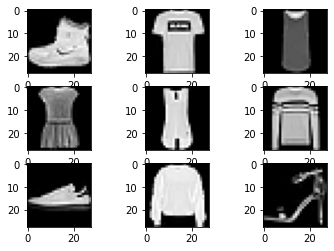

In [46]:
for i in range(9):

  # define subplot

  plt.subplot(3,3,i+1)

  # plot raw pixel data

  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))

# show the figure

plt.show()

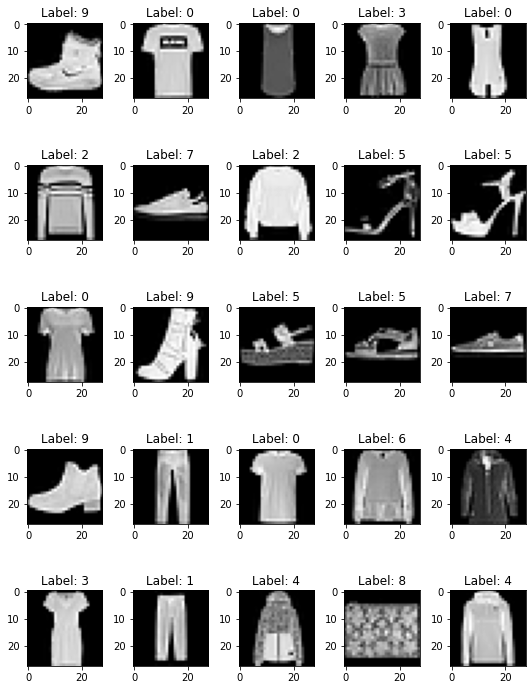

In [62]:
# specify the number of rows and columns you want to see
num_row = 5
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [30]:
#performing normalization

In [32]:
x_train=x_train/255,0
x_test=x_test/255,0

In [47]:
#model 1(2 hidden layers)

In [49]:
model1=tf.keras.Sequential()

In [51]:
model1.add(tf.keras.layers.Flatten(input_shape=[28,28],name="InputLayer"))
model1.add(tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer1"))
model1.add(tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer2"))
model1.add(tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer"))

In [52]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [61]:
model1.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model1.fit(x_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.1)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3624 - accuracy: 0.8732 - val_loss: 0.3859 - val_accuracy: 0.8717
Epoch 2/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3455 - accuracy: 0.8773 - val_loss: 0.4255 - val_accuracy: 0.8598
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3443 - accuracy: 0.8778 - val_loss: 0.3981 - val_accuracy: 0.8647
Epoch 4/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3373 - accuracy: 0.8817 - val_loss: 0.3833 - val_accuracy: 0.8655
Epoch 5/20
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3255 - accuracy: 0.8831 - val_loss: 0.3951 - val_accuracy: 0.8682
Epoch 6/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3233 - accuracy: 0.8854 - val_loss: 0.4112 - val_accuracy: 0.8740
Epoch 7/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.3275 - accuracy: 0.8859 - val_loss: 0.4159 - val_accuracy:

In [59]:
model1.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4500 - accuracy: 0.8344


[0.4500468373298645, 0.8343999981880188]

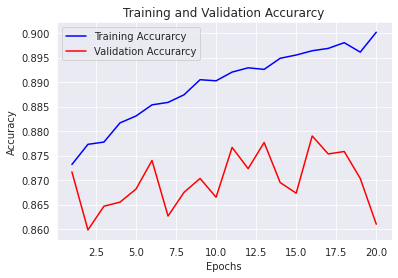

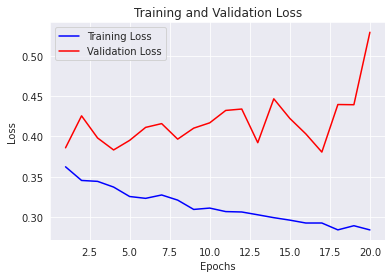

In [66]:
import seaborn as sns
#Plotting The Graphs for Accuracy and Loss of Model1
sns.set_style("darkgrid")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [54]:
#model2(5 hidden layer)

In [55]:
model2=tf.keras.Sequential()

In [56]:
model2.add(tf.keras.layers.Flatten(input_shape=[28,28],name="InputLayer"))
model2.add(tf.keras.layers.Dense(300,activation="relu",name="HiddenLayer1"))
model2.add(tf.keras.layers.Dense(250,activation="relu",name="HiddenLayer2"))
model2.add(tf.keras.layers.Dense(200,activation="relu",name="HiddenLayer3"))
model2.add(tf.keras.layers.Dense(150,activation="relu",name="HiddenLayer4"))
model2.add(tf.keras.layers.Dense(100,activation="relu",name="HiddenLayer5"))
model2.add(tf.keras.layers.Dense(10,activation="softmax",name="OutputLayer"))

In [57]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 250)               75250     
                                                                 
 HiddenLayer3 (Dense)        (None, 200)               50200     
                                                                 
 HiddenLayer4 (Dense)        (None, 150)               30150     
                                                                 
 HiddenLayer5 (Dense)        (None, 100)               15100     
                                                                 
 OutputLayer (Dense)         (None, 10)               

In [68]:
model2.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history2 = model2.fit(x_train, y_train, batch_size = 32, epochs = 15, validation_split = 0.1)

Epoch 1/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2624 - accuracy: 0.9095 - val_loss: 0.4026 - val_accuracy: 0.8853
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2472 - accuracy: 0.9124 - val_loss: 0.4955 - val_accuracy: 0.8863
Epoch 3/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2590 - accuracy: 0.9106 - val_loss: 0.4234 - val_accuracy: 0.8847
Epoch 4/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2429 - accuracy: 0.9133 - val_loss: 0.3844 - val_accuracy: 0.8863
Epoch 5/15
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2427 - accuracy: 0.9130 - val_loss: 0.4365 - val_accuracy: 0.8768
Epoch 6/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2436 - accuracy: 0.9145 - val_loss: 0.3800 - val_accuracy: 0.8857
Epoch 7/15
1688/1688 [==============================] - 11s 7ms/step - loss: 0.2300 - accuracy: 0.9165 - val_loss: 0.4000 - val_ac

In [67]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4381 - accuracy: 0.8817


[0.4380553364753723, 0.8816999793052673]

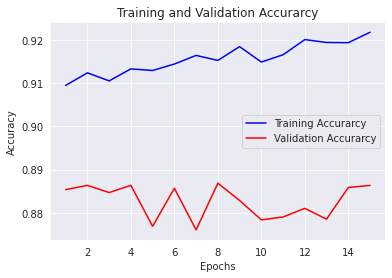

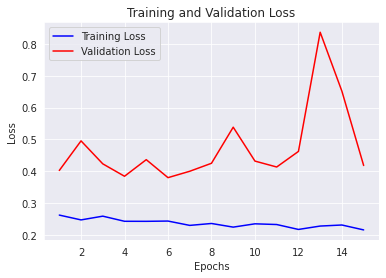

In [73]:
#Plotting The Graphs for Accuracy and Loss of Model2
sns.set_style("darkgrid")
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

## COMPARISION OF THE TWO MODELS:
## MODEL 1 HAS A HIGHER ACCURACY FOR THE TRAINING DATA AS COMPARED TO THE MODEL 2 BUT A LOWER ACCURACY FOR THE TESTING DATA.